In [1]:
import pandas as pd, numpy as np, glob
import matplotlib.pyplot as plt
!pip install --upgrade imgaug

videoDF = pd.read_csv('/kaggle/input/youtube-faces-with-facial-keypoints/youtube_faces_with_keypoints_large.csv')
print(len(videoDF))
videoDF.head(15)

     |████████████████████████████████| 948 kB 3.3 MB/s 
ERROR: albumentations 0.4.3 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.4.0 which is incompatible.
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.6
    Uninstalling imgaug-0.2.6:
      Successfully uninstalled imgaug-0.2.6
1293


videoID     personName  imageHeight  imageWidth  videoDuration  \
0   Alison_Lohman_0  Alison_Lohman        228.0       213.0          240.0   
1   Alison_Lohman_1  Alison_Lohman        248.0       201.0           79.0   
2   Alison_Lohman_2  Alison_Lohman        335.0       308.0          136.0   
3   Alison_Lohman_3  Alison_Lohman        151.0       110.0           53.0   
4   Alison_Lohman_4  Alison_Lohman        236.0       228.0          147.0   
5   Alison_Lohman_5  Alison_Lohman        227.0       179.0           68.0   
6    Kevin_Spacey_0   Kevin_Spacey        196.0       264.0           91.0   
7    Kevin_Spacey_1   Kevin_Spacey        260.0       217.0           59.0   
8    Kevin_Spacey_2   Kevin_Spacey        186.0       175.0           71.0   
9    Kevin_Spacey_3   Kevin_Spacey        100.0        89.0           99.0   
10   Kevin_Spacey_4   Kevin_Spacey        212.0       207.0          240.0   
11   Kevin_Spacey_5   Kevin_Spacey        242.0       205.0          203.0   
12  Lauren_Hutton_0  Lauren_Hutton        223.0       202.0          127.0   
13  Lauren_Hutton_1  Lauren_Hutton        279.0       213.0           68.0   
14  Lauren_Hutton_2  Lauren_Hutton        320.0       361.0           55.0   

    averageFaceSize  numVideosForPerson  
0         90.150000                 6.0  
1        108.417722                 6.0  
2        122.161765                 6.0  
3         58.000000                 6.0  
4         91.680272                 6.0  
5        105.647059                 6.0  
6         99.912088                 6.0  
7        120.186441                 6.0  
8         86.746479                 6.0  
9         44.636364                 6.0  
10        99.025000                 6.0  
11       116.886700                 6.0  
12        96.086614                 6.0  
13       107.191176                 6.0  
14       193.781818                 6.0

In [2]:
# create a dictionary that maps videoIDs to full file paths
npzFilesFullPath = glob.glob('/kaggle/input/youtube-faces-with-facial-keypoints/youtube_faces_with_keypoints_large*/*')
videoIDs = [x.split('/')[-1].split('.')[0] for x in npzFilesFullPath]
video_paths = {}
for videoID, fullPath in zip(videoIDs, npzFilesFullPath):
    video_paths[videoID] = fullPath
videoDF = videoDF.loc[videoDF.loc[:,'videoID'].isin(video_paths.keys()),:].reset_index(drop=True)
print('Number of Videos is %d' %(videoDF.shape[0]))
print('Number of Unique Individuals is %d' %(len(videoDF['personName'].unique())))

Number of Videos is 1154
Number of Unique Individuals is 347


In [3]:
# import time
# from keras.applications import vgg16
# from keras.utils.vis_utils import plot_model
# from keras.applications.vgg16 import preprocess_input
# vgg16_model = vgg16.VGG16(include_top=False, weights='imagenet',input_shape=(224,224,3))
# IMAGE_SIZE = 224
# import cv2
# import numpy as np
# from copy import deepcopy
# x_org=[]
# x_img = []
# y_org=[]
# start = time.time()

# N = videoDF.shape[0]
# for ix in range(N):
#     elapsed = time.time()-start
#     end = '\r' if ix!=N-1 else '\n'
#     print('{}/{} ({:.2f}s - {:.2f}s remaining)'.format(ix+1, N, time.time()-start, (N-ix)*(elapsed/(ix+1))), end=end)
#     vid = videoDF.loc[ix].videoID
#     vid = np.load(video_paths[vid])
#     ims = vid['colorImages']
#     frame = int(np.random.rand() * (ims.shape[3]-1))
#     image = ims[...,frame]
#     x, y = vid['landmarks2D'][:,0,frame], vid['landmarks2D'][:,1,frame]

#     x, y = [np.array(i).astype(np.float32) for i in [x,y]]
#     h, w, _ = image.shape
#     image = cv2.resize(image, (IMAGE_SIZE,IMAGE_SIZE))  
#     x, y = x/w, y/h
#     kp2 = list(x) + list(y)
#     preprocess_img = preprocess_input(image.reshape(1,224,224,3))
#     vgg16_img = vgg16_model.predict(preprocess_img)
#     x_img.append(image)
#     x_org.append(vgg16_img)
#     y_org.append(kp2)

# x_org = np.array(x_org)
# print(x_org.shape)
# x = x_org.reshape(len(x_org),7,7,512)
# y = np.array(y_org)
# y.shape

# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# model_vgg16 = Sequential()
# model_vgg16.add(Conv2D(512, kernel_size=(3, 3), activation='relu',input_shape=(x.shape[1],x.shape[2],x.shape[3])))
# model_vgg16.add(MaxPooling2D(pool_size=(2, 2)))
# model_vgg16.add(Flatten())
# model_vgg16.add(Dense(512, activation='relu'))
# model_vgg16.add(Dropout(0.5))
# model_vgg16.add(Dense(y.shape[1], activation='sigmoid'))
# model_vgg16.summary()

# model_vgg16.compile(loss='mean_absolute_error',optimizer='adam')
# history = model_vgg16.fit(x/np.max(x), y, epochs=10, batch_size=32, verbose=1, validation_split = 0.1)


# pred = model_vgg16.predict(vgg16_model.predict(preprocess_input(x_img[-2].reshape(1,224,224,3)))/np.max(x))

# import matplotlib.pyplot as plt
# %matplotlib inline
# plt.subplot(221)
# plt.title('Original image')
# plt.imshow(x_img[-2])
# plt.grid('off')
# plt.subplot(222)
# plt.title('Image with facial keypoints')
# plt.imshow(x_img[-2])
# kp = pred.flatten()
# plt.scatter(kp[0:68]*224, kp[68:]*224)
# plt.grid('off')

In [4]:
# ix = -np.random.randint(100)
# pred = model_vgg16.predict(vgg16_model.predict(preprocess_input(x_img[ix].reshape(1,224,224,3)))/np.max(x))

# plot(figure={'figsize':(10,10)}, imshow=x_img[ix], scatter={'x': kp[0:68]*224, 'y': kp[68:]*224})
# plt.show()

In [5]:
import matplotlib.pyplot as plt
def plot(**kwargs):
    item = kwargs.pop('ax',plt)
    for k,v in kwargs.items():
        if isinstance(v, dict)                                 : o = getattr(item, k)(**v)
        elif isinstance(v, (list, tuple))                      :
            if not any([isinstance(item, dict) for item in v]) : o = getattr(item, k)(*v)
            else:
                _v, _kw = [i for i in v if not isinstance(i, dict)], [i for i in v if isinstance(i, dict)][0]
                o = getattr(item, k)(*_v, **_kw)
        else                                                   : o = getattr(item, k)(v)
    return o

import seaborn as sns
def snsplot(*args, **kwargs): plot(ax=sns, **kwargs)

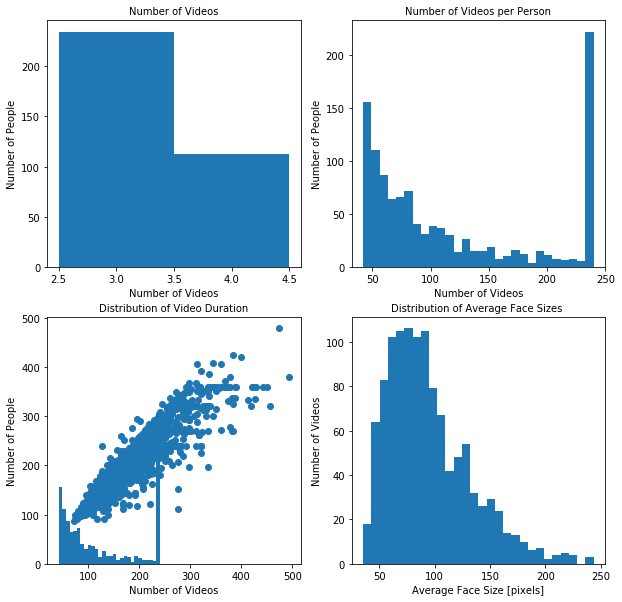

In [6]:
# overview of the contents of the dataset
groupedByPerson = videoDF.groupby("personName")
numVidsPerPerson = groupedByPerson.count()['videoID']
groupedByPerson.count().sort_values('videoID', axis=0, ascending=False)
averageFaceSize_withoutNaNs = np.array(videoDF['averageFaceSize'])
averageFaceSize_withoutNaNs = averageFaceSize_withoutNaNs[np.logical_not(np.isnan(averageFaceSize_withoutNaNs))]
    
# g = snsplot(despine={'offset':10, 'trim':True})
fig, ax = plot(close='all', subplots=(2, 2, {'figsize': (10,10)}))
font = {'fontsize':10}

plot(
    ax=ax[0,0],
    set_title=('Number of Videos', font),
    set_xlabel=('Number of Videos', font),
    set_ylabel=('Number of People', font),
    hist=({'x': numVidsPerPerson, 'bins': 0.5+np.arange(numVidsPerPerson.min()-1,numVidsPerPerson.max()+1)})
)

plot(
    ax=ax[0,1],
    set_title=('Number of Videos per Person', font),
    set_xlabel=('Number of Videos', font),
    set_ylabel=('Number of People', font),
    hist=({'x': videoDF['videoDuration'], 'bins': 28})
)

plot(
    ax=ax[1,0],
    scatter=({'x': videoDF['imageWidth'], 'y': videoDF['imageHeight']}),
    set_title=('Distribution of Video Duration', font),
    set_xlabel=('Number of Videos', font),
    set_ylabel=('Number of People', font),
    hist=({'x': videoDF['videoDuration'], 'bins': 28})
)

plot(
    ax=ax[1,1],
    hist = (averageFaceSize_withoutNaNs, {'bins':28}),
    set_title = ('Distribution of Average Face Sizes ',font),
    **{k:v for k,v in zip(['set_xlabel','set_ylabel'], 
                          [(v,{'fontsize': 10}) for v in 
                           ['Average Face Size [pixels]','Number of Videos']])}
); 

In [7]:
import cv2, time

IMAGE_SIZE = 224
from torch.utils.data import Dataset, DataLoader
import imgaug as ia
from imgaug import augmenters as iaa
from imgaug.augmentables import Keypoint, KeypointsOnImage

train_transform = iaa.Sequential([
    iaa.geometric.Affine(translate_px=(0,10), rotate=(-10,10), mode='reflect'),
    iaa.flip.Fliplr(0.5),
    iaa.PadToAspectRatio(1.0, pad_mode='reflect'),
    iaa.contrast.LinearContrast(),
    iaa.Sometimes(0.5, iaa.GaussianBlur()),
    iaa.size.Resize(IMAGE_SIZE),
])
validation_transform = iaa.Sequential([
    iaa.PadToAspectRatio(1.0, pad_mode='reflect'),
    iaa.size.Resize(IMAGE_SIZE),
])

class YouTubeFaces(Dataset):
    def __init__(self, df, tfms=None):
        self.df = df
        self.mean = np.array([0.485, 0.456, 0.406])
        self.std = np.array([0.229, 0.224, 0.225])
        self.tfms = tfms
        N = len(self.df)
        ims, ys = [], []
        start = time.time()
        for ix in range(N):
            vid = self.df.loc[ix].videoID
            vid = np.load(video_paths[vid])
            _ims = vid['colorImages']
            landmarks = vid['landmarks2D']
            h, w = _ims.shape[:2]
            for _ in range(50):
                frame = int(np.random.rand() * (_ims.shape[3]-1))
                ims.append(cv2.resize(_ims[...,frame], (IMAGE_SIZE, IMAGE_SIZE)))
                x, y = landmarks[:,0,frame], landmarks[:,1,frame]
                ys.append([x/w, y/h])
            elapsed = time.time()-start
            end = '\r' if ix!=N-1 else '\n'
            print('{}/{} ({:.2f}s - {:.2f}s remaining)'.format(ix+1, N, time.time()-start, (N-ix)*(elapsed/(ix+1))), end=end)
        self.ims = ims
        self.kps = ys
        
    def __len__(self)    : return len(self.df)
    def __getitem__(self, ix):
        image = self.ims[ix]
        x, y = self.kps[ix]
        if self.tfms:
            kps = KeypointsOnImage([
                Keypoint(x=x[ix]*IMAGE_SIZE, y=y[ix]*IMAGE_SIZE) for ix in range(68)
            ], shape=image.shape)
            image, kps = self.tfms(image=image, keypoints=kps)
            x, y = list(zip(*[(kp.x/IMAGE_SIZE,kp.y/IMAGE_SIZE) for kp in kps]))
        image = (((image/255.) - self.mean)/self.std).astype(np.float32)
        return image, [np.array(i) for i in [x,y]]


In [8]:
from sklearn.model_selection import train_test_split
df_tr, df_te = train_test_split(videoDF.personName.unique(), test_size=0.2, random_state=20)

df_tr = videoDF[videoDF.personName.isin(df_tr.tolist())].reset_index()
ds_tr = YouTubeFaces(df_tr, tfms=None)

df_te = videoDF[videoDF.personName.isin(df_te.tolist())].reset_index()
ds_te = YouTubeFaces(df_te, tfms=None)

924/924 (141.81s - 0.15s remaining)
230/230 (36.68s - 0.16s remaining)


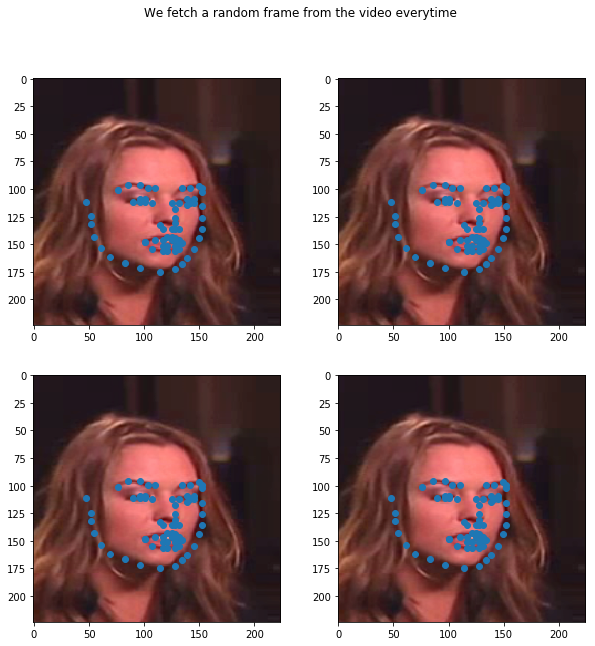

In [9]:
fig, ax = plot(subplots=(2, 2, {'figsize': (10,10)}))
plot(ax=fig, suptitle='We fetch a random frame from the video everytime')
ax = iter(ax.flat)
for _ in range(4):
    im, kps = ds_tr[10]
    x, y = kps
    im = (255 * ((ds_te.std * im) + ds_te.mean)).astype(np.uint8)
    # im = (255*im).astype(np.uint8)
    plot(ax=next(ax), imshow=im, scatter={'x': x*IMAGE_SIZE, 'y': y*IMAGE_SIZE})
plt.show()

In [10]:
import torchvision
import  torch.nn as nn
import torch
import torch.nn.functional as F
from torchvision import transforms, models, datasets
try:
    from modelsummary import summary
except:
    !pip install modelsummary
    from modelsummary import summary

  Created wheel for modelsummary: filename=modelsummary-1.1.7-py3-none-any.whl size=6952 sha256=f9133b0ce71b0c2c83390f4142fb2904c5cbeaa43d7ab041b6512de3e0c6a618
  Stored in directory: /root/.cache/pip/wheels/1f/71/72/680e25ed8958a38a118d9c3c31da31fd2be5144753d97bb66b
Successfully built modelsummary


In [11]:
from collections import OrderedDict

device='cpu'
def get_model(**kwargs):
    model = models.vgg11_bn(pretrained = True)
    # Freeze parameters so we don't backprop through them
    model.avgpool = nn.AdaptiveAvgPool2d(output_size=(1,1))
    for param in model.parameters():
        param.requires_grad = False
    model.classifier = nn.Sequential(
        nn.Linear(512,128),
        nn.ReLU(),
        nn.Dropout(0.4),
        nn.Linear(128,128),
        nn.ReLU(),
        nn.Dropout(0.25),
        nn.Linear(128,68*2),
        nn.Sigmoid(),
    )
    loss_fn = nn.L1Loss()
    optimizer = torch.optim.Adam(model.parameters(), lr=kwargs.get('lr', 1e-3))
    return model.to(device), loss_fn, optimizer

from modelsummary import summary
model, criterion, optimizer = get_model()
input = torch.tensor(ds_tr[0][0])[None].permute(0,3,1,2).float()
print(input.shape)
print(model(input).shape)
summary(model, input, show_hierarchical=True)

Downloading: "https://download.pytorch.org/models/vgg11_bn-6002323d.pth" to /root/.cache/torch/checkpoints/vgg11_bn-6002323d.pth



torch.Size([1, 3, 224, 224])
torch.Size([1, 136])
VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), 1,792 params
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), 128 params
    (2): ReLU(inplace=True), 0 params
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 0 params
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), 73,856 params
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), 256 params
    (6): ReLU(inplace=True), 0 params
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 0 params
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), 295,168 params
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), 512 params
    (10): ReLU(inplace=True), 0 params
    (11): Conv2d(256, 256, kernel_size

In [12]:
def train_batch(img, kps, model, optimizer, criterion):
    img = img.to(device)
    label = torch.cat(kps, 1)
    label = label.to(device).float()
    model.train()
    optimizer.zero_grad()
    output = model(img)
    loss = criterion(output, label)
    loss.backward()
    optimizer.step()
    return loss

def validate_batch(img, kps, model, criterion):
    label = torch.cat(kps, 1)
    with torch.no_grad():
        img = img.to(device)
        label = label.to(device).float()
        model.eval()
        ps = model(img)
        loss = criterion(ps,label)
    return ps, loss



In [13]:
device='cuda'
train_loader = DataLoader(ds_tr, batch_size=32)
test_loader = DataLoader(ds_te, batch_size=32)

model, criterion, optimizer = get_model()

train_loss, test_loss = [], []
n_epochs = 300

import time
start = time.time()
best_test_loss = 100
for epoch in range(n_epochs):
    epoch_train_loss, epoch_test_loss = 0, 0
    _n = len(train_loader)
    for ix, (img,kps) in enumerate(train_loader):
        img = img.permute(0,3,1,2)
        loss = train_batch(img, kps, model, optimizer, criterion)
        epoch_train_loss += loss.item()
        print('{}/{}\tLoss: {:.3f}'.format(ix+1, _n, loss), end='\r')

    for ix,(img,kps) in enumerate(test_loader):
        img = img.permute(0,3,1,2)
        label = x,y
        ps, loss = validate_batch(img, kps, model, criterion)
        epoch_test_loss += loss.item()

    epoch_train_loss /= len(train_loader)
    epoch_test_loss /= len(test_loader)
    train_loss.append(epoch_train_loss)
    test_loss.append(epoch_test_loss)

    if epoch_test_loss < best_test_loss:
        torch.save(model, '0.pth')
        best_test_loss  = epoch_test_loss
    else: 'we already have a better model saved on disk'

    elapsed = time.time()-start
    print('{}/{} ({:.2f}s - {:.2f}s remaining)'.format(epoch+1, n_epochs, time.time()-start, (n_epochs-epoch)*(elapsed/(epoch+1))))
    print(f'''Epoch: {epoch+1:03d}\tTrain Loss: {epoch_train_loss:.3f}\tTest: {epoch_test_loss:.3f}\tBest Test Loss: {best_test_loss:.4f}''')
    


1/300 (4.37s - 1310.58s remaining)
Epoch: 001	Train Loss: 0.072	Test: 0.064	Best Test Loss: 0.0639
2/300 (7.76s - 1160.59s remaining)
Epoch: 002	Train Loss: 0.055	Test: 0.060	Best Test Loss: 0.0595
3/300 (11.26s - 1118.04s remaining)
Epoch: 003	Train Loss: 0.052	Test: 0.058	Best Test Loss: 0.0583
4/300 (14.62s - 1085.56s remaining)
Epoch: 004	Train Loss: 0.050	Test: 0.057	Best Test Loss: 0.0570
5/300 (17.99s - 1064.89s remaining)
Epoch: 005	Train Loss: 0.048	Test: 0.056	Best Test Loss: 0.0565
6/300 (21.42s - 1052.93s remaining)
Epoch: 006	Train Loss: 0.048	Test: 0.056	Best Test Loss: 0.0560
7/300 (24.78s - 1040.68s remaining)
Epoch: 007	Train Loss: 0.047	Test: 0.056	Best Test Loss: 0.0556
8/300 (28.08s - 1028.25s remaining)
Epoch: 008	Train Loss: 0.046	Test: 0.056	Best Test Loss: 0.0556
9/300 (31.38s - 1018.26s remaining)
Epoch: 009	Train Loss: 0.045	Test: 0.056	Best Test Loss: 0.0556
10/300 (34.69s - 1009.61s remaining)
Epoch: 010	Train Loss: 0.045	Test: 0.056	Best Test Loss: 0.0556
1

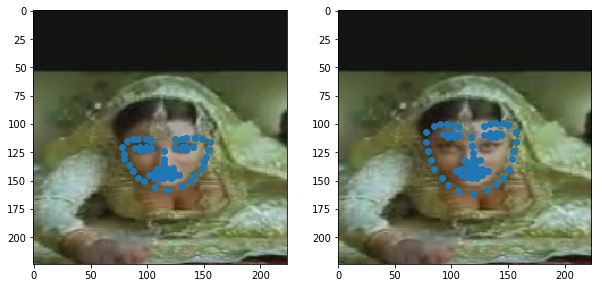

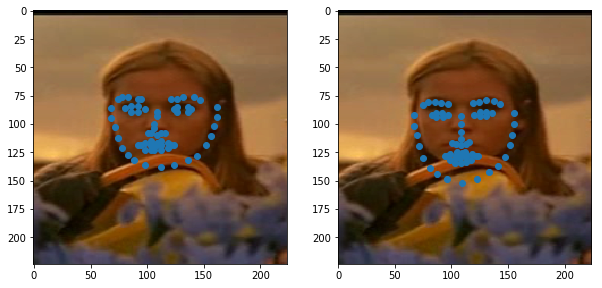

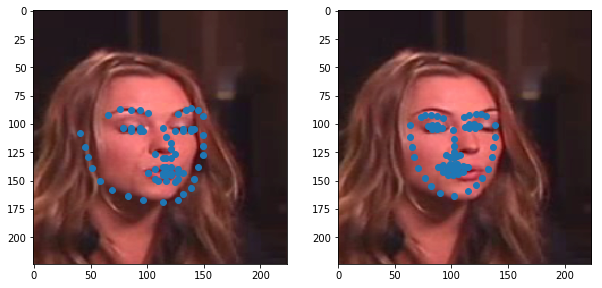

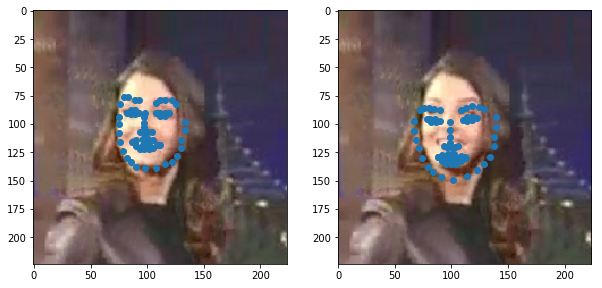

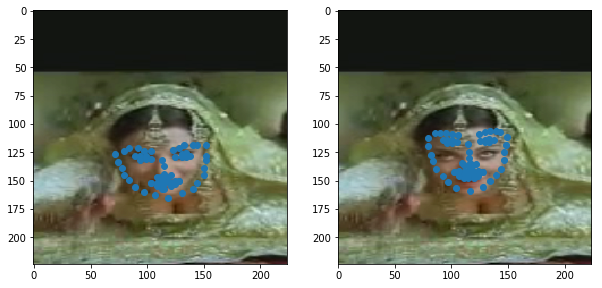

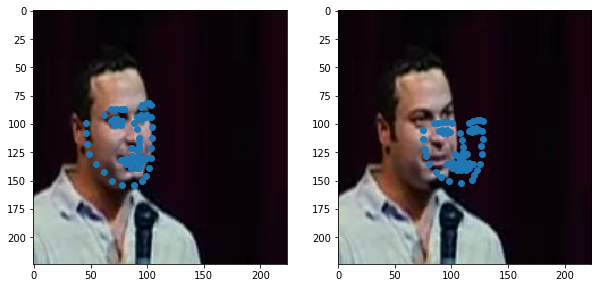

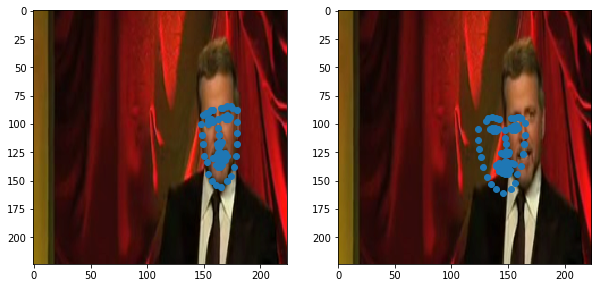

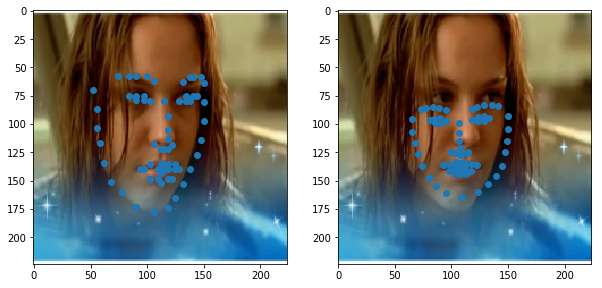

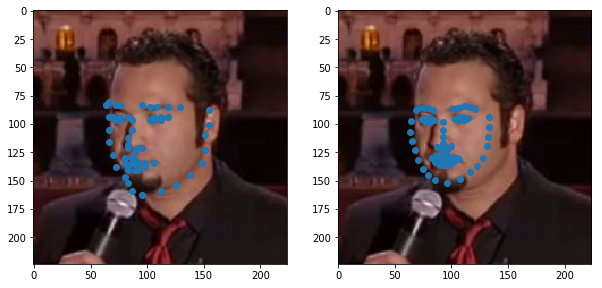

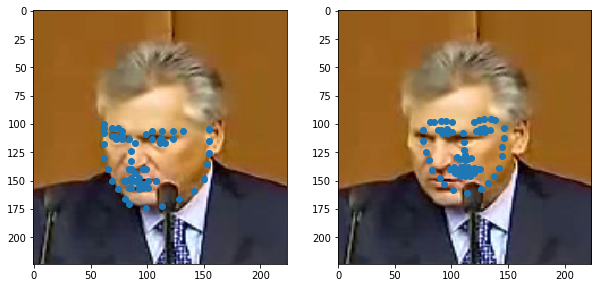

In [14]:
# plot(ax=fig, suptitle='We fetch a random frame from the video everytime')
# ax = iter(ax.flat)
for _ in range(10):
    im, kps = ds_tr[np.random.randint(len(ds_tr))]
    x, y = kps
    input = torch.tensor(im)[None].permute(0,3,1,2).float().to(device)
    _kps = model(input)[0].to('cpu').detach()
    
    im = (255 * ((ds_te.std * im) + ds_te.mean)).astype(np.uint8)
    
    _x, _y = _kps[:68], _kps[68:]
    fig, ax = plot(subplots=(1, 2, {'figsize': (10,10)})); ax = iter(ax.flat)
    plot(imshow=im, ax=next(ax), scatter={'x': x*IMAGE_SIZE, 'y': y*IMAGE_SIZE})
    plot(imshow=im, ax=next(ax), scatter={'x': _x*IMAGE_SIZE, 'y': _y*IMAGE_SIZE})
    plt.show()
